<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [6]:
def _get_scores_from_nmi_file(nmi_file):
    with open(nmi_file) as f:
        lines = f.readlines()
        max_score = float(lines[0].split('\t')[1])
        lfkScore = float(lines[2].split('\t')[1])
        sum_score = float(lines[3].split('\t')[1])
        return max_score, lfkScore, sum_score
        
input_types = ['AllNodes', 'Leaves_NoOverlap', 'Leaves_WithOverlap']

nmi_file_template = '{mac_maf}_{val}_all/step_{ns_ss}/{input_type}.txt'

In [38]:
nmi_folder = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/nmi/"

mac_min_range = 2
mac_max_range = 18
maf_min_range = 1
maf_max_range = 49
ns_ss = 0.005

input_type_2_lfk_nmi = dict()
#NOTE regarding Leafs_WithOverlap:
#     in our previous work we used the leaves with overlap! see page 2031, on the left, "Information gain by increased sequencing", paragraph 3.
#NOTE regarding LFK-NMI:
#     in our previous work we used the LFK NMI measure! see Appendix D in SI, first paragraph.
for input_type in input_types:
    format_to_print = "{:<10}{:<8}{:<20}{:<20}{:<20}"
    print(input_type)
    print(format_to_print.format("mac/maf", "val", "max score", "lfk score", "sum scores"))
    input_type_2_lfk_nmi[input_type] = dict()
    class_2_lfk_nmi = input_type_2_lfk_nmi[input_type]
    # go over classes
    for mac_maf in ['mac', 'maf']:
        is_mac = mac_maf == 'mac'
        min_range = mac_min_range if is_mac else maf_min_range
        max_range = mac_max_range if is_mac else maf_max_range
        if min_range>0:
            for val in range(min_range, max_range+1):
                # in maf we take 0.x
                if not is_mac:
                    val = f'{val * 1.0/100}'
                nmi_file = nmi_folder + nmi_file_template.format(mac_maf=mac_maf, val=val,ns_ss=ns_ss, input_type=input_type)
                max_score, lfkScore, sum_score = _get_scores_from_nmi_file(nmi_file)
                print(format_to_print.format(mac_maf, val, max_score, lfkScore, sum_score))
                class_2_lfk_nmi[f'{mac_maf}_{val}'] = max_score

AllNodes
mac/maf   val     max score           lfk score           sum scores          
mac       2       0.2265              0.413777            0.331675            
mac       3       0.242649            0.406497            0.344246            
mac       4       0.250987            0.385532            0.352952            
mac       5       0.303032            0.403879            0.421202            
mac       6       0.373057            0.416936            0.506195            
mac       7       0.221592            0.358249            0.313272            
mac       8       0.357695            0.406416            0.477005            
mac       9       0.368198            0.377324            0.488449            
mac       10      0.286461            0.388421            0.387276            
mac       11      0.362829            0.395383            0.475409            
mac       12      0.382938            0.387033            0.50715             
mac       13      0.383009            0.388

In [3]:
input_type_2_lfk_nmi

{'AllNodes': {'mac_2': 0.0,
  'mac_3': 0.0,
  'mac_4': 0.0,
  'mac_5': 0.234212,
  'mac_6': 0.326948,
  'mac_7': 0.282622,
  'mac_8': 0.318446,
  'mac_9': 0.389617,
  'mac_10': 0.368465,
  'mac_11': 0.295858,
  'mac_12': 0.417417,
  'mac_13': 0.371111,
  'mac_14': 0.309966,
  'mac_15': 0.359709,
  'mac_16': 0.37202,
  'mac_17': 0.3995,
  'mac_18': 0.35954,
  'maf_0.01': 0.449561,
  'maf_0.02': 0.42647,
  'maf_0.03': 0.418426,
  'maf_0.04': 0.468121,
  'maf_0.05': 0.453676,
  'maf_0.06': 0.466134,
  'maf_0.07': 0.478072,
  'maf_0.08': 0.490844,
  'maf_0.09': 0.439603,
  'maf_0.1': 0.472426,
  'maf_0.11': 0.491769,
  'maf_0.12': 0.456432,
  'maf_0.13': 0.470733,
  'maf_0.14': 0.467092,
  'maf_0.15': 0.495283,
  'maf_0.16': 0.480116,
  'maf_0.17': 0.483262,
  'maf_0.18': 0.432838,
  'maf_0.19': 0.461337,
  'maf_0.2': 0.493809,
  'maf_0.21': 0.43478,
  'maf_0.22': 0.454684,
  'maf_0.23': 0.451916,
  'maf_0.24': 0.5188,
  'maf_0.25': 0.456916,
  'maf_0.26': 0.455161,
  'maf_0.27': 0.443765,

AllNodes


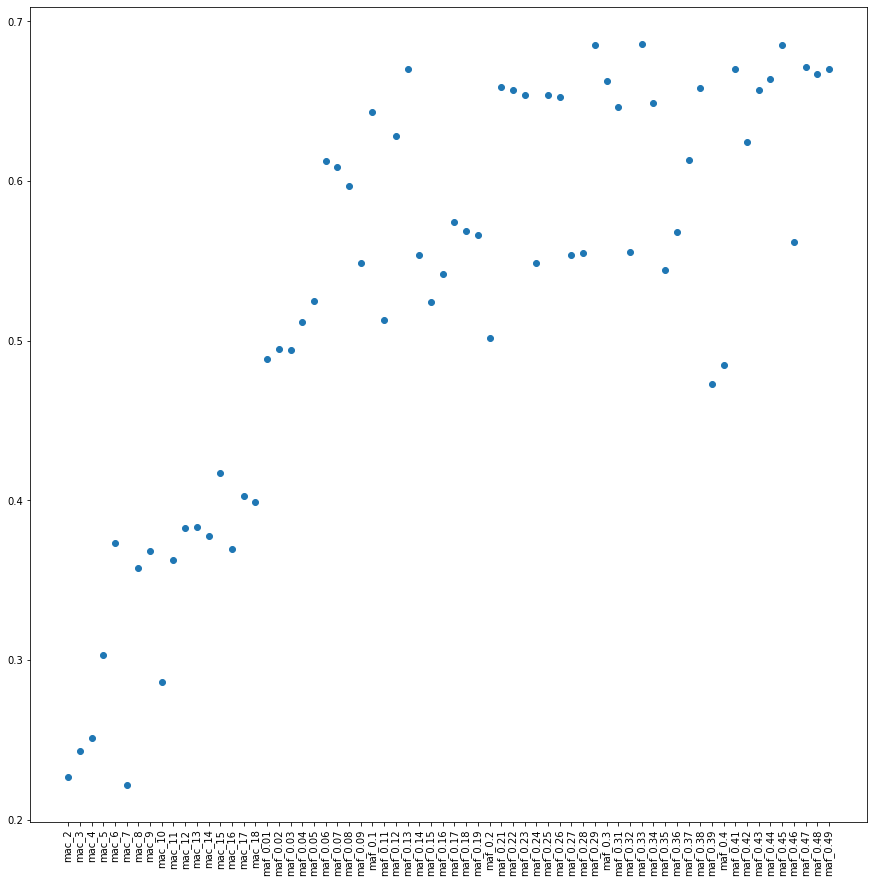

Leaves_NoOverlap


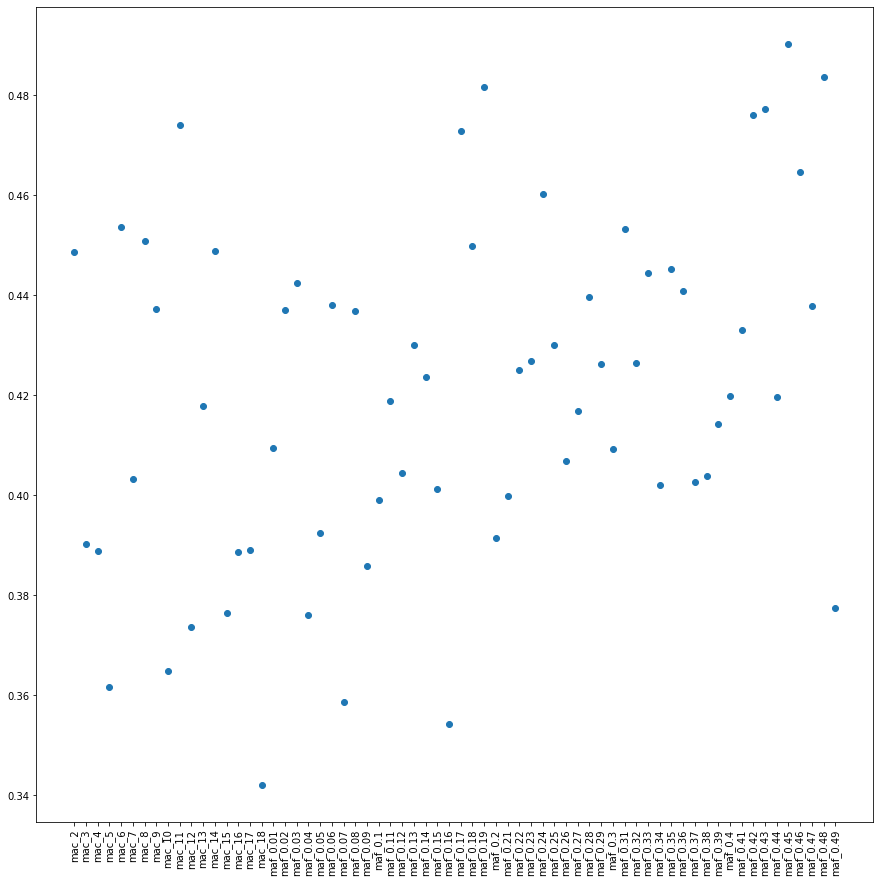

Leaves_WithOverlap


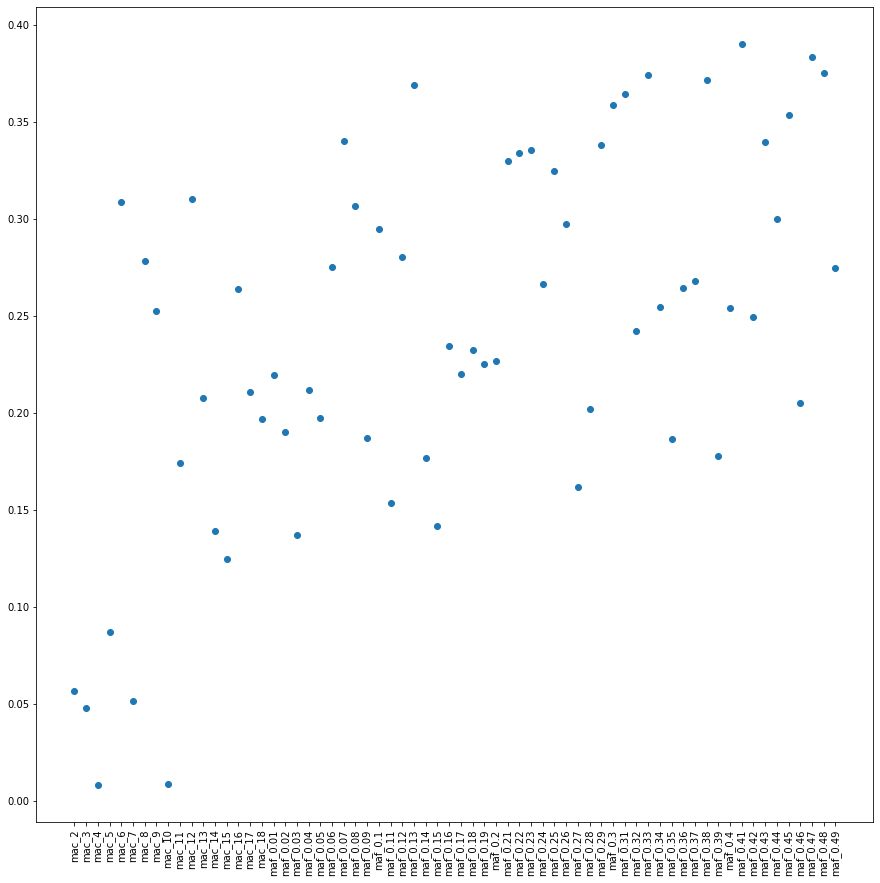

In [39]:
import matplotlib.pyplot as plt

#plot_lkf_nmi_by_class
for input_type in input_types:
    print(input_type)
    class_2_lfk_nmi = input_type_2_lfk_nmi[input_type]
    x = [str(k) for k in class_2_lfk_nmi.keys()]
    y = [v for v in class_2_lfk_nmi.values()]
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    ax = f.add_subplot(111)
    #for i,j in zip(x,y):
    #    ax.annotate(str(j),xy=(i,j))

    plt.scatter(x, y)
    plt.xticks(rotation = 90)
    plt.savefig(nmi_folder + input_type+'.png')
    plt.show()
